**1. QUESTION**

In [91]:
import numpy as np
from scipy.linalg import toeplitz

In [92]:
A=toeplitz([2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [93]:
A

array([[ 2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  2, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

##1) a##

To check whether this matrix is (strictly) diagonal dominant, we need to check whether diagonal elements are (strictly) larger than the sum of the absolute values of the other elements in their respective rows. If this is the case, the matrix is (strictly) diagonal dominant.

In [94]:
def diagonally_dominant(A):
  # Get the dimensions of the matrix
    m, n = len(A), len(A[0])

    if m != n:
        return False

    for i in range(m):
    # Calculate the sum of the absolute values of the other elements in the same row
        row_sum = sum(abs(A[i][j]) for j in range(n) if j != i)

    # Check if the main diagonal element is larger than the row sum
        if A[i][i] < row_sum:
            return False
    return True

In [95]:
 diagonally_dominant(A)

True

The condition number of a matrix is a measure of how sensitive the output of a linear system is to changes in the input. It is defined as the ratio of the maximum singular value of the matrix to the minimum singular value.

In [96]:
import numpy as np

def condition_number(A):
  # Compute the singular values of the matrix
  s = np.linalg.svd(A, compute_uv=False)

  # Return the condition number
  return np.max(s) / np.min(s)
  
print(condition_number(A))

178.06427461086128


## Jacobi Method

In [128]:
def jacobi(A,b,x,n):
    
    B = A - np.diag(np.diagonal(A))
    
    for k in range(n):
        
        x = (b - np.dot(B, x)) / np.diagonal(A) 
         
    return x


In [97]:
x_0=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [98]:
b=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]

In [99]:
jacobi(A,b,x_0,25)

array([ 1.40493084,  2.80977272,  4.1922914 ,  5.57417377,  6.91951157,
        8.26173091,  9.56218178, 10.8503757 , 12.09027152, 13.29038943,
       14.41178539, 15.42437486, 16.26932708, 16.85934784, 17.09153516,
       16.80519307, 15.83107148, 13.93037759, 10.85926207,  6.31692667])

## Gauss Seidal Method

In [127]:
def gauss_seidel(A, b,x,n):
    for k in range(n):
        for i in range(20):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x[(i+1):])) / A[i ,i]
       
    return x

In [101]:
gauss_seidel(A,b,x_0,25)

[2.139200782576765,
 4.351227848156034,
 6.622857117667845,
 8.940488077465847,
 11.289084431634386,
 13.650535424086957,
 16.00141779450943,
 18.31022310539526,
 20.534211090699927,
 22.61613826621353,
 24.481173337624796,
 26.03433242274984,
 27.15874129659651,
 27.714961666056332,
 27.54151506540629,
 26.45661790381198,
 24.26102271150541,
 20.741760022574915,
 15.676504344698563,
 8.838252172349282]

### Comparison


To see how the Jacobi and Gauss Seidal methods converge, let's first look at the relationship to the real value.

Based on the results from the real value ​​and methods, we can identify the errors and see which method converges better.

In [130]:
np.linalg.solve(A, b)

array([ 7.33333333, 14.56666667, 21.6       , 28.33333333, 34.66666667,
       40.5       , 45.73333333, 50.26666667, 54.        , 56.83333333,
       58.66666667, 59.4       , 58.93333333, 57.16666667, 54.        ,
       49.33333333, 43.06666667, 35.1       , 25.33333333, 13.66666667])

Error from Jacobi method [0.07862353 0.15530673 0.22815569 0.29542467 0.35550003 0.40702858
 0.44885497 0.48014221 0.50028759 0.50901382 0.50628031 0.49234415
 0.46766878 0.4329692  0.38911237 0.3371629  0.2782754  0.2137456
 0.14490846 0.07318324]
Error from Gauss Seidal method [0.06369823 0.12456653 0.18131566 0.23277651 0.27792343 0.31589379
 0.34600356 0.3677585  0.38086095 0.38521205 0.38090956 0.36824126
 0.34767442 0.31984133 0.28552169 0.24562195 0.20115237 0.15320231
 0.10291422 0.05145711]


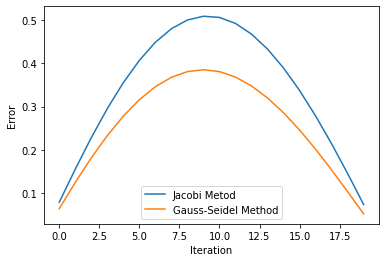

In [131]:

import matplotlib.pyplot as plt

x_actual = np.linalg.solve(A, b)
x_jacobi = jacobi(A,b,x_0,25)
x_gauss_seidel = gauss_seidel(A,b,x_0,25)


jacobi_error = np.abs(x_actual - x_jacobi)
gauss_seidel_error = np.abs(x_actual - x_gauss_seidel)

print("Error from Jacobi method", jacobi_error)
print("Error from Gauss Seidal method", gauss_seidel_error)

plt.plot(jacobi_error, label='Jacobi Metod')
plt.plot(gauss_seidel_error, label='Gauss-Seidel Method')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.show()



As we see from the graph, Gauss-Seidel Method converges faster than Jacobi Method here